1. Implement the intensity transformation

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Load the grayscale image

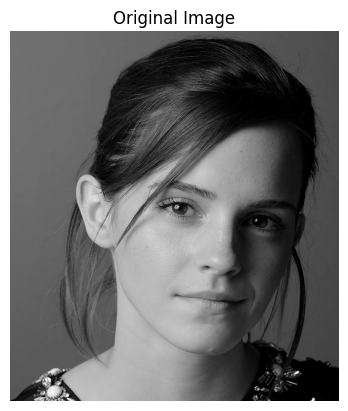

In [6]:
image_path = "a1images/emma.jpg"
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide axis
plt.show()

In [7]:
t1 = np.linspace(0, 50, 50).astype('uint8')
t2 = np.linspace(100, 255, 100).astype('uint8')
t3 = np.linspace(150, 256, 106).astype('uint8')

lookup_table = np.concatenate([t1, t2, t3])